In [15]:
import numpy
import math 
from matplotlib import pyplot
#display figures in teh Notebook
%matplotlib inline

In [32]:
N = 200                              # Number of points in each
x_start, x_end = -4.0, 4.0           # x-direction boundaries 
y_start, y_end = -2.0, 2.0           # y-direction boundaries 
x = numpy.linspace(x_start, x_end, N) # 1D-array for x
y = numpy.linspace(y_start, y_end, N) # 1D-array for y
X, Y = numpy.meshgrid(x, y)           # generates a mesh grid

In [33]:
numpy.shape(X)

(200, 200)

In [34]:
u_inf = 1.0              # freestream speed

# compute the freestream velocity field 
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

In [35]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    parameters
    ----------
    strength: float 
        Strength of the source/sink.
    xs: float 
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats 
        x-coordinate of the mesh points
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points. 
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [36]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink.
    
    parameters
    ----------
    strength: float 
        Strength of the source/sink.
    xs: float 
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats 
        x-coordinate of the mesh points
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points. 
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.



In [37]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the steam-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float 
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of teh source (or sink).
    X: 2D Numpy array of floats 
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Return
    ------
    psi: 2D Numpy array of floats
        The stream-function
    """
    psi = strength / (2* numpy.pi) * numpy.arctan2((Y - ys), 
                                                  (X - xs))
    return psi

In [38]:
strength_source = 5.0            # strength of the source 
x_source, y_source = -1.0, 0.0   # location of the source 

# compute the celocity field 
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X,Y)


NameError: name 'py' is not defined

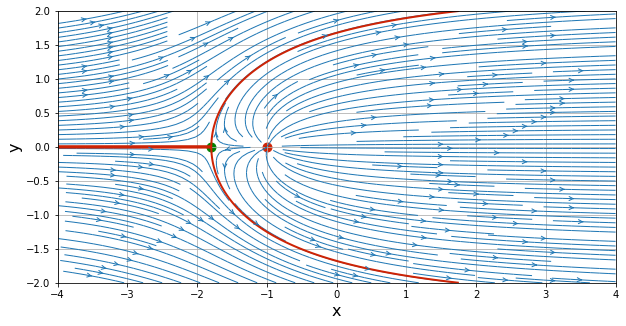

In [44]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

#plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, 
                  arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
              levels = [-strength_source / 2, strength_source / 2],
              colors = '#CD2305', linewidths=2, linestyles='solid');

""" challenge question: what is the maximum width of the rankine 
                        half body?"""

In [11]:
strength_sink = -5.0                # strength of the sink 
x_sink, y_sink = 1.0, 0.0           # location of the sink

# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh 
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)


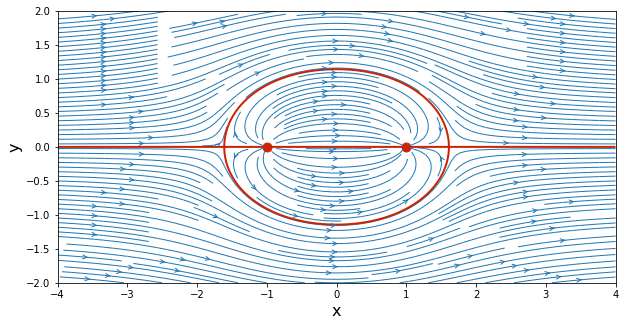

In [12]:
# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,
                 arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
              color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, 
              levels = [0.], colors='#CD2305', linewidths=2,
              linestyles='solid');

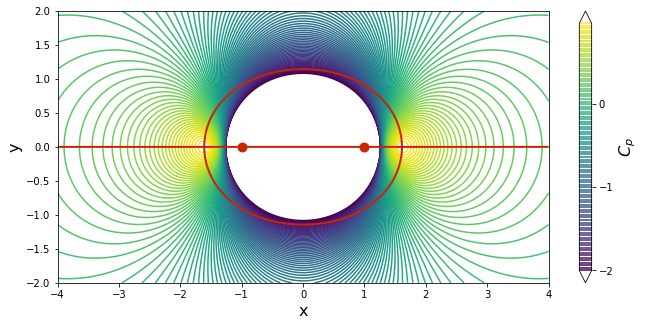

In [13]:
# compute the pressure coefficient field 
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field 
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contour(X, Y, cp,
                      levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
              color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
              levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');